<a href="https://colab.research.google.com/github/XinyaoT/pytorch-deep-learning/blob/main/mynotes/02_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

##1. data get ready


In [ ]:
import sklearn
from sklearn.datasets import make_circles
# make 1000 sanples
n_samples = 1000
X,y = make_circles(n_samples,noise = 0.03,random_state = 42)
X[:10],y[:10]


(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X1":X[:,0],"X2":X[:,1],"label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


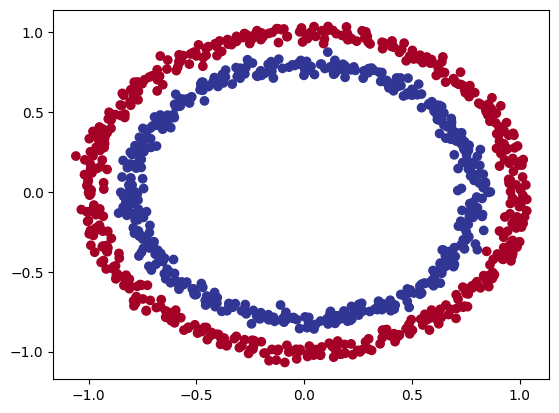

In [ ]:
# visualize
import matplotlib.pyplot as plt
plt.scatter(x = X[:,0],y = X[:,1],c = y,cmap = plt.cm.RdYlBu)
plt.show()

note :分类上述数据集

###1.1 检查输入输出的形状

In [ ]:
X.shape,y.shape

((1000, 2), (1000,))

###1.2 把数据转化成tensor和split to 训练集和测试机

In [ ]:
import torch
from sklearn.model_selection import train_test_split

type(X),type(y),X.dtype,y.dtype

(numpy.ndarray, numpy.ndarray, dtype('float64'), dtype('int64'))

In [ ]:
# 将数据转成tensor
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
type(X),type(y),X.dtype,y.dtype

(torch.Tensor, torch.Tensor, torch.float32, torch.float32)

In [ ]:
# split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

##2. build a model

In [ ]:
import torch
from torch import nn
# device
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [ ]:
# 1. 创建model
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. 两个线性层
    # self.layer_1 = nn.Linear(in_features = 2,out_features = 5)
    # self.layer_2 = nn.Linear(in_features = 5,out_features = 1)  #输出与y的shape匹配

    # squential
    self.two_linear_layers = nn.Sequential(
        nn.Linear(in_features = 2,out_features = 5),
        nn.Linear(in_features = 5,out_features = 1)
    )
  def forward(self,x):
    # return self.layer_2(self.layer_1(x))
    return self.two_linear_layers(x)

In [ ]:
# 实例化模型
model_0 = CircleModelV0()
model_0.to(device)

CircleModelV0(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [ ]:
# # nn.squential()
# model_0 = nn.Sequential(
#     nn.Linear(in_features = 2,out_features = 5),
#     nn.Linear(in_features = 5,out_features = 1)
# )

In [ ]:
# prediction
with torch.inference_mode():
  y_untrain_preds = model_0(X_test.to(device))
  print(f"untrain preds : {y_untrain_preds[:10]},X_test:{X_test[:10]}")
  print(f"untrain preds shape : {y_untrain_preds.shape},X_test shape:{X_test.shape}")
  print(f"y_test shape : {y_test.shape},y_test:{y_test[:10]}")

untrain preds : tensor([[0.4950],
        [0.6561],
        [0.0456],
        [0.6225],
        [0.0024],
        [0.1010],
        [0.5888],
        [0.4587],
        [0.0481],
        [0.6664]], device='cuda:0'),X_test:tensor([[-0.3752,  0.6827],
        [ 0.0154,  0.9600],
        [-0.7028, -0.3147],
        [-0.2853,  0.9664],
        [ 0.4024, -0.7438],
        [ 0.6323, -0.5711],
        [ 0.8561,  0.5499],
        [ 1.0034,  0.1903],
        [-0.7489, -0.2951],
        [ 0.0538,  0.9739]])
untrain preds shape : torch.Size([200, 1]),X_test shape:torch.Size([200, 2])
y_test shape : torch.Size([200]),y_test:tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


###2.1 loss function
回归：MAE MSE
分类：CE
* lossfunction :`torch.nn`
* optimizer: `torch.optim`

In [ ]:
# loss
loss_fn = nn.BCEWithLogitsLoss()
# 结合 sigmoid和CE
optimizer= torch.optim.SGD(params = model_0.parameters(),lr = 0.1)

In [39]:
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

##3. train model


###3.1 raw logits ->prediction 概率->预测标签

####whatis logits
在深度学习的上下文中，logits 就是一个向量，下一步通常被投给 softmax/sigmoid 的向量。。

softmax的输出是分类任务的概率，其输入是logits层。 logits层通常产生-infinity到+ infinity的值，而softmax层将其转换为0到1的值。
                        
原文链接：https://blog.csdn.net/weixin_43135178/article/details/122236217

In [ ]:
y_logits = model_0(X_test.to(device))
y_logits[:10]

tensor([[0.4950],
        [0.6561],
        [0.0456],
        [0.6225],
        [0.0024],
        [0.1010],
        [0.5888],
        [0.4587],
        [0.0481],
        [0.6664]], device='cuda:0', grad_fn=<SliceBackward0>)

In [ ]:
# sigmoid——把特征转化成概率
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs[:10]

tensor([[0.6213],
        [0.6584],
        [0.5114],
        [0.6508],
        [0.5006],
        [0.5252],
        [0.6431],
        [0.6127],
        [0.5120],
        [0.6607]], device='cuda:0', grad_fn=<SliceBackward0>)

* 概率大于0.5，class1
* 概率小于0.5，class0

In [ ]:
torch.round(y_pred_probs[:10])

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0', grad_fn=<RoundBackward0>)

In [ ]:
# in full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device)))).squeeze()
y_pred_labels[:10]

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], device='cuda:0',
       grad_fn=<SliceBackward0>)

* BCELoss:输入是logits，也就是先要sigmoid之后，把sigmoid的结果输入这个lossfun
* BCEWithLogitsLoss：输入是网络输出的特征向量，它里面包含了sigmoid

###3.2 train & test


In [51]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epoch = 1000
# data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)
for epoch in range(epoch):
  ### training
  model_0.train()
  y_train_logits = model_0(X_train).squeeze()
  y_train_pred = torch.round(torch.sigmoid(y_train_logits))
  loss = loss_fn(y_train_logits,y_train)
  acc = accuracy_fn(y_true = y_train,y_pred = y_train_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true = y_test,y_pred = test_pred)

  # shuchu
  if epoch % 100 ==0:
    print(f"epoch:{epoch},train_loss:{loss},trainacc:{acc}")
    print(f"test_loss:{test_loss},testacc:{acc}")

epoch:0,train_loss:0.6929840445518494,trainacc:51.125
test_loss:0.694873034954071,testacc:51.125
epoch:100,train_loss:0.6929819583892822,trainacc:51.0
test_loss:0.6948145627975464,testacc:51.0
epoch:200,train_loss:0.6929807662963867,trainacc:51.24999999999999
test_loss:0.6947741508483887,testacc:51.24999999999999
epoch:300,train_loss:0.6929803490638733,trainacc:51.5
test_loss:0.6947458982467651,testacc:51.5
epoch:400,train_loss:0.6929801106452942,trainacc:51.37500000000001
test_loss:0.6947262287139893,testacc:51.37500000000001
epoch:500,train_loss:0.6929800510406494,trainacc:51.5
test_loss:0.6947124600410461,testacc:51.5
epoch:600,train_loss:0.6929798722267151,trainacc:51.5
test_loss:0.6947027444839478,testacc:51.5
epoch:700,train_loss:0.6929798722267151,trainacc:51.5
test_loss:0.6946958899497986,testacc:51.5
epoch:800,train_loss:0.6929798722267151,trainacc:51.24999999999999
test_loss:0.6946910619735718,testacc:51.24999999999999
epoch:900,train_loss:0.6929798722267151,trainacc:51.125
t

### our work dosent work
visualize——决策边界——可视化工具使用
skip

### 非直线，需要Relu激活函数

In [68]:
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Sequential(
        nn.Linear(in_features = 2,out_features = 10),

        nn.Linear(in_features = 10,out_features = 10),

        nn.Linear(in_features = 10,out_features = 1),
        nn.ReLU()
    )
  def forward(self,x):
    return self.layer_1(x)
model_2 = CircleModelV2()
model_2.to(device)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epoch = 1000
loss_fn =nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),lr = 0.01)
# data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)
for epoch in range(epoch):
  ### training
  model_2.train()
  y_train_logits = model_2(X_train).squeeze()
  y_train_pred = torch.round(torch.sigmoid(y_train_logits))
  loss = loss_fn(y_train_logits,y_train)
  acc = accuracy_fn(y_true = y_train,y_pred = y_train_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_2.eval()
  with torch.inference_mode():
    test_logits = model_2(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true = y_test,y_pred = test_pred)

  # shuchu
  if epoch % 100 ==0:
    print(f"epoch:{epoch},train_loss:{loss},trainacc:{acc}")
    print(f"test_loss:{test_loss},testacc:{test_acc}")


epoch:0,train_loss:0.6952366232872009,trainacc:50.875
test_loss:0.6944398283958435,testacc:51.0
epoch:100,train_loss:0.6943891048431396,trainacc:50.375
test_loss:0.6941307783126831,testacc:51.0
epoch:200,train_loss:0.6938087344169617,trainacc:50.0
test_loss:0.6938201785087585,testacc:49.0
epoch:300,train_loss:0.6931477189064026,trainacc:49.375
test_loss:0.6931471824645996,testacc:50.0
epoch:400,train_loss:0.6931471824645996,trainacc:50.0
test_loss:0.6931471824645996,testacc:50.0
epoch:500,train_loss:0.6931471824645996,trainacc:50.0
test_loss:0.6931471824645996,testacc:50.0
epoch:600,train_loss:0.6931471824645996,trainacc:50.0
test_loss:0.6931471824645996,testacc:50.0
epoch:700,train_loss:0.6931471824645996,trainacc:50.0
test_loss:0.6931471824645996,testacc:50.0
epoch:800,train_loss:0.6931471824645996,trainacc:50.0
test_loss:0.6931471824645996,testacc:50.0
epoch:900,train_loss:0.6931471824645996,trainacc:50.0
test_loss:0.6931471824645996,testacc:50.0


In [65]:
model_2.state_dict()

OrderedDict([('layer_1.0.weight',
              tensor([[ 0.5394,  0.5865],
                      [-0.1632,  0.6501],
                      [-0.1570,  0.1422],
                      [-0.3457,  0.4149],
                      [ 0.6196, -0.5196],
                      [ 0.6184,  0.1331],
                      [ 0.5211,  0.0954],
                      [ 0.3391, -0.1003],
                      [ 0.5371,  0.1027],
                      [-0.3373,  0.1787]], device='cuda:0')),
             ('layer_1.0.bias',
              tensor([-0.3256, -0.0834, -0.2868,  0.4693, -0.5575, -0.3267, -0.1995, -0.4248,
                       0.0682, -0.6971], device='cuda:0')),
             ('layer_1.1.weight',
              tensor([[ 2.9136e-01, -2.6873e-01,  2.4355e-01,  4.9870e-02, -9.7759e-02,
                        2.0104e-01,  5.3904e-02,  2.5868e-01,  3.8965e-02, -1.0107e-01],
                      [ 7.3961e-02, -8.5659e-02,  1.3418e-01,  2.8746e-01,  1.7360e-01,
                       -1.4890e-01,  1.73

##8.多分类


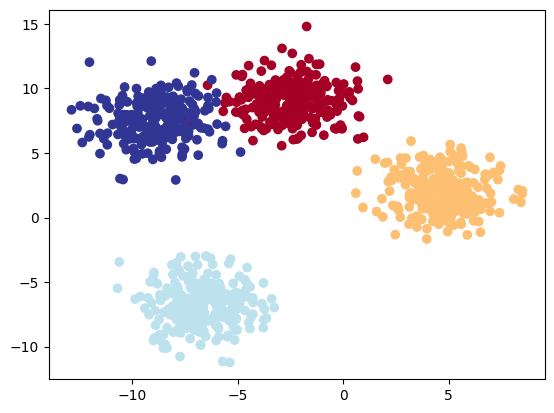

In [36]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob,y_blob = make_blobs(n_samples = 1000,
                           n_features = NUM_FEATURES,
                           centers = NUM_CLASSES,
                           cluster_std = 1.5,
                           random_state = RANDOM_SEED)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
X_blob_train,X_blob_test,y_blob_train,y_blob_test = train_test_split(X_blob,y_blob,test_size = 0.2,random_state = RANDOM_SEED)
plt.scatter(X_blob[:,0],X_blob[:,1],c = y_blob,cmap = plt.cm.RdYlBu)

In [24]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cpu'

In [25]:
class BlobModel(nn.Module):
  def __init__(self,input_features,output_features,hidden_units=8):
    """
    args:
    input feature(int):number of input features to the model
    output_features(int):number of output features of the model
    hidden_units(int):number of hidden units between layers,default = 8
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features,out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units,out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units,out_features =output_features)
        )
  def forward(self,x):
    return self.linear_layer_stack(x)

model_3 = BlobModel(input_features = NUM_FEATURES,output_features = NUM_CLASSES)
model_3.to(device)


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [26]:
# 损失函数
loss_fn = nn.CrossEntropyLoss()
# youhuaqi
optimizer = torch.optim.SGD(params = model_3.parameters(),lr = 0.1)

### 8.4 logits->概率->标签


In [37]:
model_3.eval()
with torch.inference_mode():
  logits = model_3(X_blob_test.to(device))
logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]])

In [28]:
# logits->gailv
y_pred_probs = torch.softmax(logits,dim = 1)
y_pred_probs[:10]

tensor([[0.3244, 0.2211, 0.1994, 0.2551],
        [0.3141, 0.2181, 0.2030, 0.2649],
        [0.5426, 0.0797, 0.2869, 0.0909],
        [0.3170, 0.2076, 0.2285, 0.2469],
        [0.3655, 0.2321, 0.1825, 0.2198],
        [0.3164, 0.2189, 0.2020, 0.2627],
        [0.5305, 0.0819, 0.2946, 0.0930],
        [0.3495, 0.2285, 0.1888, 0.2331],
        [0.5755, 0.0695, 0.2763, 0.0787],
        [0.3548, 0.2298, 0.1867, 0.2287]])

In [17]:
torch.sum(y_pred_probs[0])

tensor(1.0000)

In [29]:
# gailv->label
y_pred = torch.argmax(y_pred_probs,dim = 1)
y_pred[:10]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [32]:
X_blob_train.dtype

torch.int64

###8.3Train

In [40]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 1000

X_blob_train,X_blob_test,y_blob_train,y_blob_test = X_blob_train.to(device),X_blob_test.to(device),y_blob_train.to(device),y_blob_test.to(device)
X_blob_train.dtype
for epoch in range(epochs):
  model_3.train()
  y_logits = model_3(X_blob_train)
  y_pred = torch.softmax(y_logits,dim = 1).argmax(dim = 1)
  loss = loss_fn(y_logits,y_blob_train.to(device))
  acc = accuracy_fn(y_true = y_blob_train,y_pred = y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_blob_test.to(device))
    test_pred = torch.softmax(test_logits,dim = 1).argmax(dim = 1)
    test_loss = loss_fn(test_logits,y_blob_test.to(device))
    test_acc = accuracy_fn(y_true = y_blob_test,y_pred = test_pred)
  if epoch % 10 ==0:
    print(f"epoch:{epoch}|train_loss:{loss}|train_acc:{acc}|test_loss:{test_loss}|test_acc:{test_acc}")


epoch:0|train_loss:1.1588267087936401|train_acc:40.375|test_loss:1.0755422115325928|test_acc:48.0
epoch:10|train_loss:0.6447553038597107|train_acc:96.75|test_loss:0.660687267780304|test_acc:97.5
epoch:20|train_loss:0.4253515303134918|train_acc:98.5|test_loss:0.43074119091033936|test_acc:100.0
epoch:30|train_loss:0.2529422640800476|train_acc:99.125|test_loss:0.24507610499858856|test_acc:99.5
epoch:40|train_loss:0.11232147365808487|train_acc:99.25|test_loss:0.10228512436151505|test_acc:99.5
epoch:50|train_loss:0.06626509130001068|train_acc:99.25|test_loss:0.058475371450185776|test_acc:99.5
epoch:60|train_loss:0.05068016052246094|train_acc:99.25|test_loss:0.042932283133268356|test_acc:99.5
epoch:70|train_loss:0.04299675300717354|train_acc:99.25|test_loss:0.034909654408693314|test_acc:99.5
epoch:80|train_loss:0.038361385464668274|train_acc:99.25|test_loss:0.02987821027636528|test_acc:99.5
epoch:90|train_loss:0.03524842858314514|train_acc:99.25|test_loss:0.02662651054561138|test_acc:99.5
ep

###other 指标
* accuracy
* F1-Score
* ...

In [41]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 13.7 MB/s eta 0:00:00


In [43]:
from torchmetrics import Accuracy
accuracy = Accuracy(task = "multiclass",num_classes = 4).to(device)
accuracy(test_pred,y_blob_test)

tensor(0.9950)